In [1]:
from generate_simulation import Activation_general,Inactivation_general
import curve_fitting as cf
import numpy as np
import general_plotter as plotter
import eval_helper as eh
import matplotlib.pyplot as plt

--No graphics will be displayed.


In [2]:
na16_inact = Inactivation_general(channel_name='na16')
na16_act = Activation_general(channel_name='na16')

In [3]:
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10,
    8000,
    1,
    1
]
best_hof = [9.620300982359241, 0.21993431832978777, 8.2339691150931, 0.09663441819856214, 380.8108084530479, 0.00045895494796917627, 3.48737541561204, 0.026220690361812977, 128.66054601004203, 0.013521969367008347, 83.01986699334272, 0.0008620403821080834, 0.07974238837154095, 0.8827668558090755, 0.11733441999281465, 5.487455056670334, 988.1231282210897, 0.03168072638749948, -18.806787951438174, -12.227199082887001, 28029.123465929326, 4.562304349720758, 10.430301316983911]
p = initial_params_list

In [4]:
hmm_act = Activation_general(channel_name='na12mut8st')
hmm_inact = Inactivation_general(channel_name='na12mut8st')
eh.change_params(best_hof, scaled=False, is_HMM=True, sim_obj=hmm_act)
eh.change_params(best_hof, scaled=False, is_HMM=True, sim_obj=hmm_inact)

In [5]:
x = na16_act.genActivation()


In [6]:
y = hmm_act.genActivation()

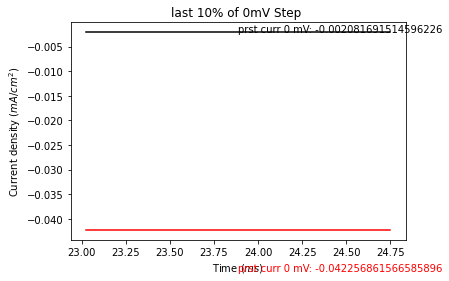

In [7]:
plotter.plot_prst_curr(na16_act,plt_in=plt)
plotter.plot_prst_curr(hmm_act,plt_in=plt,color='red')

In [8]:
prst_curr,t_mask = na16_act.get_perst_curr(0)
print(np.mean(prst_curr))
print(cf.calc_act_prst_curr(na16_act))

-0.002081691514596226
-0.002081691514596226


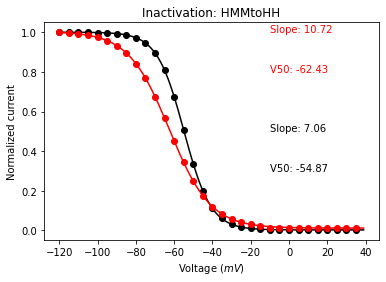

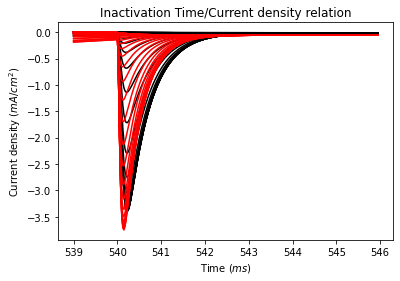

In [9]:
plotter.plot_inact(None, 'na16', False,p,'na12mut8st',True,"./Plots_Folder/jinan_testInact.pdf", "HMMtoHH")

In [10]:
prst_curr,t_mask = act_obj.get_perst_curr(v_trace)

NameError: name 'act_obj' is not defined

In [ ]:
na16_inact = Inactivation_general(channel_name='na16')
na16_inact.genInactivation()
ssi_slope, v_half_inact, top, bottom = cf.calc_inact_obj(na16_inact)
plotter.plotInactivation_TCurrDensityRelation(na16_inact)


In [ ]:
na16_act = Activation_general(channel_name='na16')
gv_slope, v_half_act, top, bottom = cf.calc_act_obj(na16_act)
time_to_peak = na16_act.find_time_to_peak([14,33])
peak_amp = na16_act.find_peak_amp([14,33])

plotter.plotActivation_TCurrDensityRelation(na16_act)

In [ ]:
wild_data ={}
wild_data['v_half_act'] = v_half_act
wild_data['gv_slope'] = gv_slope
wild_data['v_half_ssi'] = v_half_inact
wild_data['ssi_slope'] = ssi_slope
#wild_data['tau_fast'] = 1 / k_fast
#wild_data['tau_slow'] = 1 / k_slow
#wild_data['percent_fast'] = percent_fast
# wild_data['udb20'] = 0
wild_data['tau0'] = tau0
# wild_data['ramp'] = ramp_area
# wild_data['persistent'] = persistent_curr

# Some extra objectives added last minute, so this is a bit hard-coded
wild_data['peak_amp'] = peak_amp
wild_data['time_to_peak'] = time_to_peak
print(wild_data)